In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Group_5_data_cleaned.csv")
df.head()

,Unnamed: 0,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),is_Winter,is_Spring,is_Summer,is_Autumn,is_Holiday,is_Functioning_day,Month,Day,int_date
0,0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
1,1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
2,2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
3,3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
4,4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0


In [3]:
df = df.drop(['Unnamed: 0'],axis=1)
X = df.drop('Rented Bike Count',axis=1)
y = df['Rented Bike Count']

Text(0, 0.5, 'WCSS')

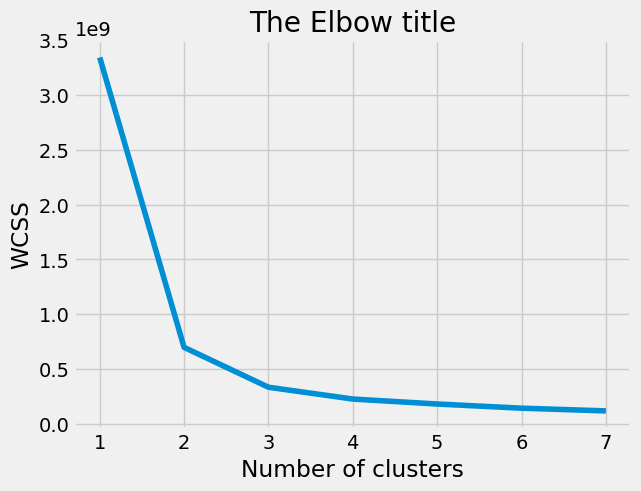

In [7]:
# Finding number of custers using the elbow method
wcss=[]
for i in range(1,8):
 kmeans = KMeans(i)
 kmeans.fit(X)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)

number_clusters = range(1,8)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

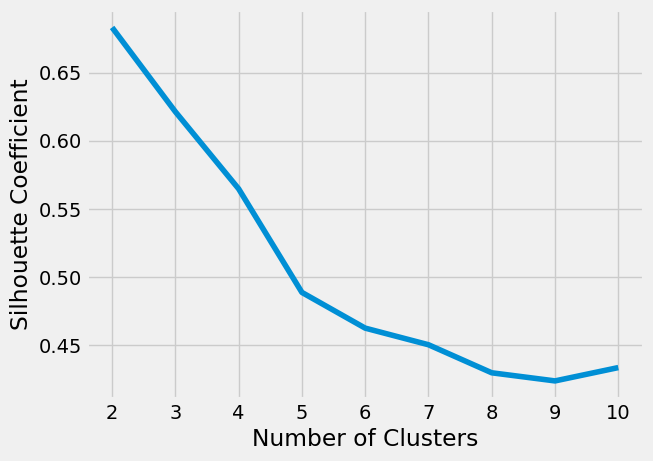

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics
from scipy import stats

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.30, random_state=42)

silhouette_coefficients = []

kmeans_kwargs= {
    "init":"random",
    "n_init":10,
    "max_iter":300,
    "random_state":42
}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)
    
# Plotting graph to choose the best number of clusters
# with the most Silhouette Coefficient score

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Selected 3 clusters

In [18]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [19]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [20]:
df['clusters'] = y_kmeans
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),is_Winter,is_Spring,is_Summer,is_Autumn,is_Holiday,is_Functioning_day,Month,Day,int_date,clusters
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0,1


In [21]:
df['clusters'].unique()

array([1, 0, 2], dtype=int32)

<AxesSubplot:>

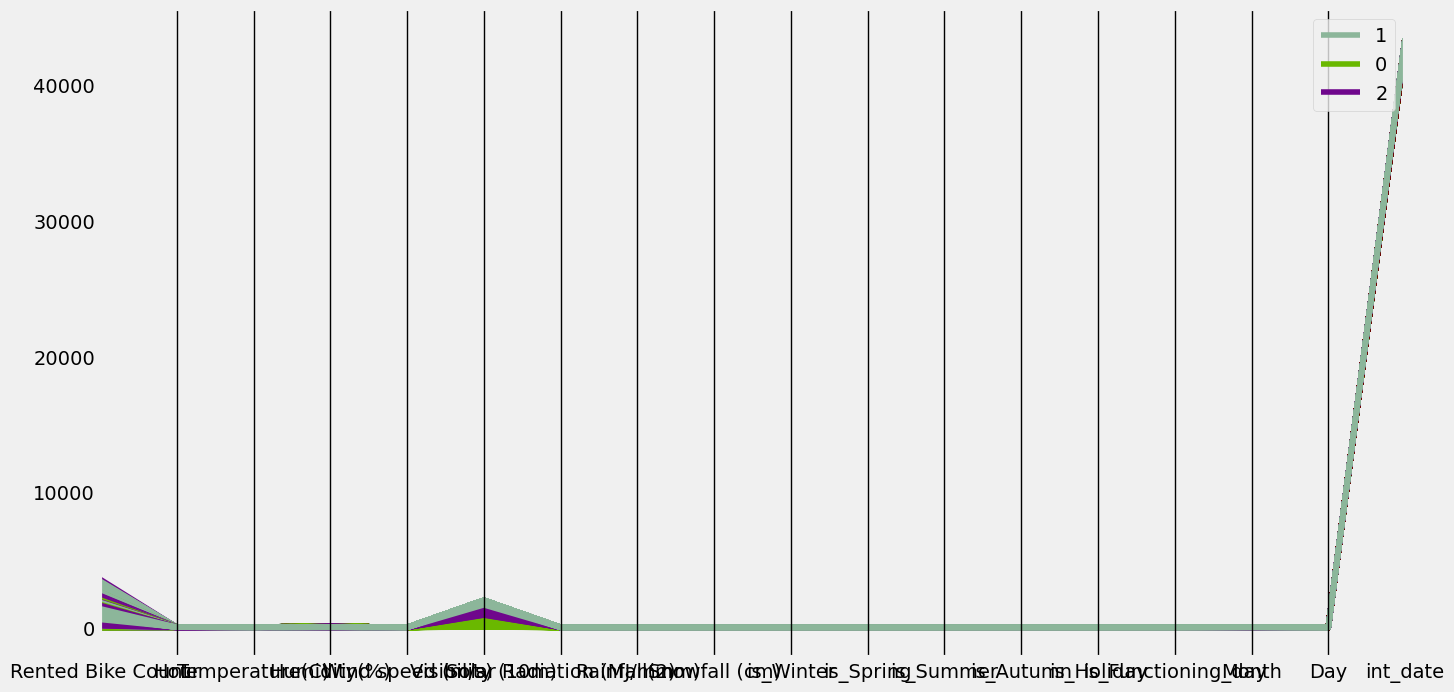

In [22]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,8))

parallel_coordinates(df, 'clusters')

# Selecting top 2 features

In [28]:
df_1=df[['Hour','Temperature(C)']]

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(df_1[['Hour']])
df_1['Hour']=model.transform(df_1[['Hour']])
scaler = MinMaxScaler()
mol = scaler.fit(df_1[['Temperature(C)']])
df_1['Temperature(C)'] = mol.transform(df_1[['Temperature(C)']])

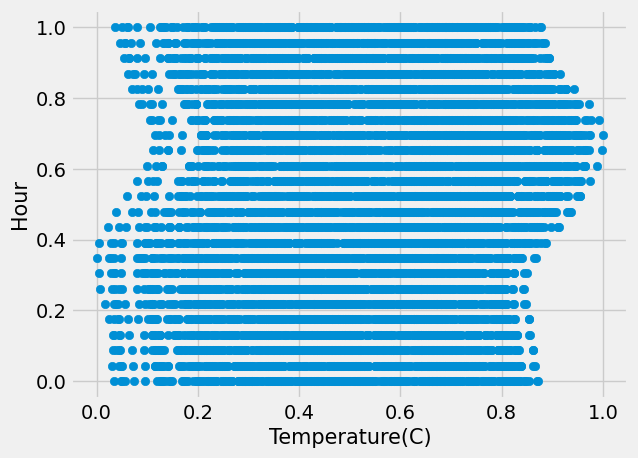

In [31]:
plt.scatter(df_1['Temperature(C)'], df_1['Hour'])
plt.xlabel('Temperature(C)', fontsize=15)
plt.ylabel('Hour', fontsize=15);

In [32]:
X1 = df_1[['Hour','Temperature(C)']]

Text(0, 0.5, 'WCSS')

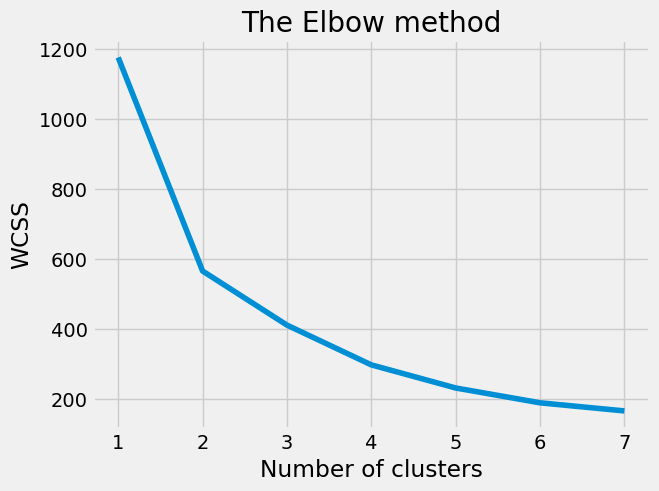

In [34]:
# Finding number of custers using the elbow method
wcss=[]
for i in range(1,8):
 kmeans = KMeans(i)
 kmeans.fit(X1)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)

number_clusters = range(1,8)
plt.plot(number_clusters,wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [35]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X1)

In [36]:
cluster = kmeans.predict(X1)
cluster

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [37]:
df_1['Cluster'] = cluster
df_1

,Hour,Temperature(C),Cluster
0,0.000000,0.220280,3
1,0.043478,0.215035,3
2,0.086957,0.206294,3
3,0.130435,0.202797,3
4,0.173913,0.206294,3
...,...,...,...
8755,0.826087,0.384615,0
8756,0.869565,0.370629,0
8757,0.913043,0.356643,0
8758,0.956522,0.347902,0


In [38]:
kmeans.labels_

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [39]:
kmeans.cluster_centers_

array([[0.79415101, 0.38122083],
       [0.23309232, 0.65329537],
       [0.72662825, 0.73582161],
       [0.23915179, 0.310732  ]])

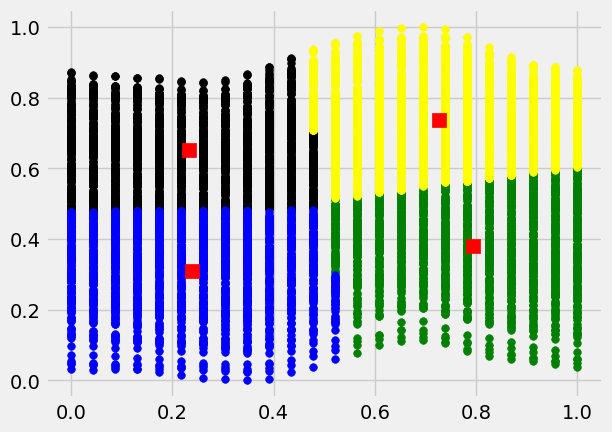

In [41]:
labels = [0, 1, 2,3]
colors = ["green", "black", "yellow","blue" ]

for label, color in zip(labels, colors):
    index = df_1["Cluster"]==label
    plt.scatter(df_1.loc[index, "Hour"],
                df_1.loc[index, "Temperature(C)"],
                c = color,
                s=30)
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="red", marker="s", s=100);